<a href="https://colab.research.google.com/github/grommitt/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

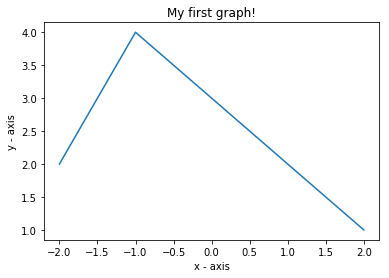

In [2]:
import matplotlib.pyplot as plt 
# does pass vertical line test

# x axis values 
x = [-2,-1,2] 
# corresponding y axis values 
y = [2,4,1] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.show() 


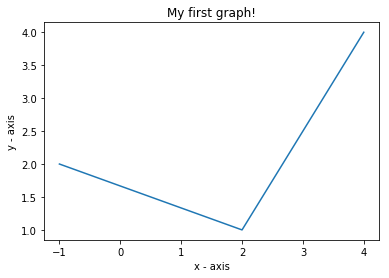

In [3]:
# does not pass vertical line test
# x axis values 
x = [-1,2,4] 
# corresponding y axis values 
y = [2,1,4] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.show() 


## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

because their exists more than one point on the y-axis for every point on the x-axis

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

relation 2 is a function becuase it only has one x-value for every y-value

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

m: 3 dimensional input. 3 dimensional output.

n: 4 dimensional input. 2 dimensional output.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

i dont know. come back to this later.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
pT(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} 1 & 3 \\-1  & 2 \\  \end{bmatrix}
\\
\\
qT(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4 &  1 &   2 \\-1 & 2 & 3 \\ 5 & 1 & -2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

\begin{align}
p(\begin{bmatrix}3 \\ 4 \end{bmatrix}) = \begin{bmatrix} 3 & 12 \\-3  & 8 \\  \end{bmatrix}
\\
\\
\begin{bmatrix}1 & 3\\ -1 & 2 \\\end{bmatrix} \begin{bmatrix} 3 \\4 \\   \end{bmatrix} = \begin{bmatrix} 3 & 12 \\-3  & 8 \\  \end{bmatrix}
\end{align}


\begin{align}
q(\begin{bmatrix}3 \\ 4 \\ 5 \end{bmatrix}) = \begin{bmatrix} 12 & 4 & 10 \\-3  & 8 & 15 \\ 15 & 4 & -10 \\  \end{bmatrix}
\\
\\
\begin{bmatrix}4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2\end{bmatrix} \begin{bmatrix} 3 \\4 \\ 5 \end{bmatrix} = \begin{bmatrix} 12 & 4 & 10 \\-3  & 8 & 15 \\ 15 & 4 & -10 \\  \end{bmatrix}
\end{align}


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [37]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv"

df = pd.read_csv(url)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#standardize the data 

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values
y = df.loc[:, 'species'].values

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [39]:
#pca projection 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)

finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


In [40]:
print("\n Eigenveectors: \n",pca.components_), 

print("\n Eigenvalues: \n", pca.explained_variance_)


 Eigenveectors: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

 Eigenvalues: 
 [2.93035378 0.92740362]


In [31]:
import numpy as np
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# define a matrix (we'll pretend that we've already separated our X and Y matrices)
X = np.array([df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']])
#print("Data: ", X)


# calculate the mean of each column
# center columns by subtracting column means
for col in df.columns:
  df[col] = np.subtract(df[col], np.mean(df[col]))
sdf = df
cdf.head()

# calculate covariance matrix of centered matrix
# We're not going to find the covaraicne matrix by the (Z^T)(Z) method, I trust this function more
for col in cdf.columns[0:4]:
  sdf[col] = np.divide(sdf[col], np.std(sdf[col]))
df.head()

covariance = np.matmul(np.transpose(sdf), sdf)

ValueError: ignored

In [29]:
covariance = np.matmul(np.transpose(sdf), sdf)

ValueError: ignored

In [30]:
values, vectors = np.linalg.eig(covariance)
print('Eigenvectors: ', vectors)

print()
print('Egeinvalues: '), values

NameError: ignored

In [0]:
# calculate the mean of each column
means = mean(X.T, axis=1)
print("\n Means: \n", means)
# center columns by subtracting column means
centered_data = X - means
print("\n Centered Data: \n", centered_data)
# calculate covariance matrix of centered matrix
# We're not going to find the covaraicne matrix by the (Z^T)(Z) method, I trust this function more
covariance_matrix = cov(centered_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)
# eigendecomposition of covariance matrix
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
# project data
P = vectors.T.dot(centered_data.T)
print("\n Projected Data: \n", P.T)

In [0]:
df.mean()

In [0]:
x = [-2.82842712,0,2.82842712] 
y = [0,0,0]
data = {"x": x, "y": y}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)